In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv('BankChurners.csv')

In [ ]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [ ]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

DATA CLEANING



In [ ]:
df.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


In [ ]:
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 23)


In [ ]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
null_percentage = df.isnull().sum() / len(df) * 100

print(null_percentage)

CLIENTNUM                                                                                                                             0.0
Attrition_Flag                                                                                                                        0.0
Customer_Age                                                                                                                          0.0
Gender                                                                                                                                0.0
Dependent_count                                                                                                                       0.0
Education_Level                                                                                                                       0.0
Marital_Status                                                                                                                        0.0
Income_Category                   

In [ ]:
import pandas as pd
from scipy.stats import zscore

def remove_outliers_and_count(df, column, threshold=3):
    df = df.copy()
    df[column] = df[column].astype(float)

    z_scores = zscore(df[column].dropna())


    mask = abs(z_scores) <= threshold


    num_rows_before = len(df)


    df_cleaned = df[mask | df[column].isna()]
    df_cleaned = df_cleaned.drop(columns=['outlier_mask'], errors='ignore')


    num_rows_after = len(df_cleaned)

    num_removed = num_rows_before - num_rows_after

    return df_cleaned, num_removed


df_age_cleaned, num_removed_age = remove_outliers_and_count(df, 'Customer_Age', threshold=2.5)
df_credit_limit_cleaned, num_removed_credit_limit = remove_outliers_and_count(df, 'Credit_Limit', threshold=2.5)

df_cleaned = pd.merge(df_age_cleaned, df_credit_limit_cleaned, how='inner')
print(f"Number of rows removed from Customer_Age: {num_removed_age}")
print(f"Number of rows removed from Credit_Limit: {num_removed_credit_limit}")
print(f"Number of rows remaining in the DataFrame: {len(df_cleaned)}")

Number of rows removed from Customer_Age: 86
Number of rows removed from Credit_Limit: 621
Number of rows remaining in the DataFrame: 9421


In [ ]:
df = df_cleaned


In [ ]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45.0,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49.0,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40.0,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40.0,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9416,772366833,Existing Customer,50.0,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
9417,710638233,Attrited Customer,41.0,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
9418,716506083,Attrited Customer,44.0,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
9419,717406983,Attrited Customer,30.0,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


data visualization


In [ ]:
ex.pie(df,names='Card_Category',title='Propotion Of Different Card Categories',hole=0.50)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Pie(
        labels=['<b>Female</b>', '<b>Male</b>'],
        values=df.Gender.value_counts(),
        hole=0.4,
        pull=[0.15, 0.15],
        textinfo='label+percent',
        marker=dict(colors=['lightcoral', 'lightskyblue'])
    )
)

fig.update_layout(
    title_text="<b>Overall Gender Breakdown</b>",
    title_x=0.5,
    title_font_size=24,
    height=500,
    width=500,
    paper_bgcolor='whitesmoke',
    plot_bgcolor='white'
)

fig.show()



In [ ]:
fig = go.Figure()
silver_data = df.query('Card_Category == "Silver"').Gender.value_counts()
fig.add_trace(
    go.Pie(
        labels=silver_data.index,
        values=silver_data.values,
        hole=0.4,
        pull=[0.1, 0.1],
        textinfo='label+percent',
        marker=dict(colors=['red', 'black']),
        textfont=dict(size=16)
    )
)

fig.update_layout(
    title_text="<b>Silver Card Holders' Gender Distribution</b>",
    title_x=0.5,
    title_font_size=14,
    height=500,
    width=500,
    paper_bgcolor='whitesmoke',
    plot_bgcolor='white',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.1,
        xanchor="center",
        x=0.5
    )
)

fig.show()



In [ ]:


fig = go.Figure()

fig.add_trace(
    go.Pie(
        labels=['<b>Female Blue</b>', '<b>Male Blue</b>'],
        values=df.query('Card_Category == "Blue"').Gender.value_counts(),
        hole=0.4,
        pull=[0.1, 0.1],
        textinfo='label+percent',
        marker=dict(colors=['lightgreen', 'orchid'])
    )
)

fig.update_layout(
    title_text="<b>Blue Card Holders' Gender Distribution</b>",
    title_x=0.5,
    title_font_size=14,
    height=500,
    width=500,
    paper_bgcolor='whitesmoke',
    plot_bgcolor='white'
)

fig.show()


In [ ]:
import pandas as pd

overall_gender_counts = df.Gender.value_counts()
total_overall = overall_gender_counts.sum()
overall_percentages = overall_gender_counts / total_overall * 100


silver_gender_counts = df[df.Card_Category == "Silver"].Gender.value_counts()
total_silver = silver_gender_counts.sum()
silver_percentages = silver_gender_counts / total_silver * 100

#
blue_gender_counts = df[df.Card_Category == "Blue"].Gender.value_counts()
total_blue = blue_gender_counts.sum()
blue_percentages = blue_gender_counts / total_blue * 100

overall_summary = "Overall Gender Distribution:\n" + "\n".join([f"{gender}: {percent:.2f}%" for gender, percent in overall_percentages.items()])
platinum_summary = "\nSilver Card Holders' Gender Distribution:\n" + "\n".join([f"{gender}: {percent:.2f}%" for gender, percent in silver_percentages.items()])
blue_summary = "\nBlue Card Holders' Gender Distribution:\n" + "\n".join([f"{gender}: {percent:.2f}%" for gender, percent in blue_percentages.items()])

full_summary = f"{overall_summary}\n{platinum_summary}\n{blue_summary}"
print(full_summary)

Overall Gender Distribution:
F: 55.80%
M: 44.20%

Silver Card Holders' Gender Distribution:
F: 55.48%
M: 44.52%

Blue Card Holders' Gender Distribution:
F: 55.73%
M: 44.27%


so there are more female users in our dataset


In [ ]:
ex.pie(df,names='Education_Level',title='Propotion Of Education Levels',hole=0.50)

AROUND 70 PERCENT OF  PEOPLE  ARE EDUCATED AND 50 PERCENT ARE WELL EDUCATED


In [ ]:

ex.pie(df,names='Attrition_Flag',title='Proportion of existing vs attired customers',hole=0.50)

AROUND 80 PERCENT ARE EXISTING CUSTOMERS

In [ ]:
ex.pie(df,names='Income_Category',title='Propotion Of Different Income Levels',hole=0.50)

around 50 percent people have income around 40k-60k dollars


DATA ENCODING

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()






In [ ]:
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])
df['Card_Category_encoded'] = label_encoder.fit_transform(df['Card_Category'])
df['Education_Level_encoded'] = label_encoder.fit_transform(df['Education_Level'])
df['Marital_Status_encoded'] = label_encoder.fit_transform(df['Marital_Status'])
df['Income_Category_encoded'] = label_encoder.fit_transform(df['Income_Category'])
df['Attrition_Flag_encoded'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)
df = df.drop(columns=['Gender', 'Card_Category', 'Education_Level', 'Marital_Status','Income_Category'])

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Gender_encoded,Card_Category_encoded,Education_Level_encoded,Marital_Status_encoded,Income_Category_encoded,Attrition_Flag_encoded
0,768805383,Existing Customer,45.0,3,39,5,1,3,12691.0,777,...,1.625,0.061,0.000093,0.99991,1,0,3,1,2,0
1,818770008,Existing Customer,49.0,5,44,6,1,2,8256.0,864,...,3.714,0.105,0.000057,0.99994,0,0,2,2,4,0
2,713982108,Existing Customer,51.0,3,36,4,1,0,3418.0,0,...,2.333,0.000,0.000021,0.99998,1,0,2,1,3,0
3,769911858,Existing Customer,40.0,4,34,3,4,1,3313.0,2517,...,2.333,0.760,0.000134,0.99987,0,0,3,3,4,0
4,709106358,Existing Customer,40.0,3,21,5,1,0,4716.0,0,...,2.500,0.000,0.000022,0.99998,1,0,5,1,2,0


In [ ]:
X = df.drop(['Attrition_Flag', 'Attrition_Flag_encoded', 'CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], axis=1)
Y = df['Attrition_Flag_encoded']



In [ ]:
X.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_encoded', 'Card_Category_encoded', 'Education_Level_encoded',
       'Marital_Status_encoded', 'Income_Category_encoded'],
      dtype='object')

  1.Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.8, random_state=42)

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(train_x, train_y)

predictions = rf_model.predict(test_x)
print(classification_report(test_y, predictions))




              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6311
           1       0.92      0.71      0.80      1226

    accuracy                           0.94      7537
   macro avg       0.93      0.85      0.88      7537
weighted avg       0.94      0.94      0.94      7537




Top Features by Permutation Importance:

                     Feature    Importance
11            Total_Trans_Ct  9.653708e-02
10           Total_Trans_Amt  3.261245e-02
7        Total_Revolving_Bal  2.688072e-02
3   Total_Relationship_Count  1.685021e-02
12       Total_Ct_Chng_Q4_Q1  1.233913e-02
9       Total_Amt_Chng_Q4_Q1  5.254080e-03
4     Months_Inactive_12_mon  4.856044e-03
5      Contacts_Count_12_mon  2.441290e-03
14            Gender_encoded  6.368582e-04
0               Customer_Age  1.061430e-04
6               Credit_Limit -4.440892e-17
15     Card_Category_encoded -1.857503e-04
2             Months_on_book -1.857503e-04
17    Marital_Status_encoded -2.653576e-04
1            Dependent_count -3.449648e-04
18   Income_Category_encoded -7.430012e-04
16   Education_Level_encoded -1.273716e-03
8            Avg_Open_To_Buy -1.432931e-03
13     Avg_Utilization_Ratio -1.698288e-03


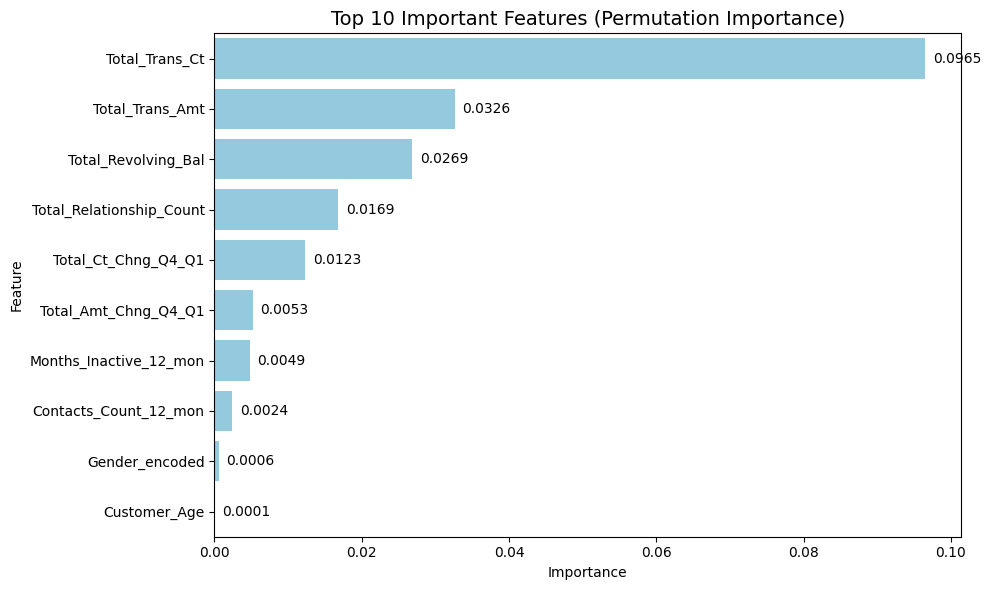

In [ ]:
#!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance  #

# Permutation importance
perm = PermutationImportance(rf_model, random_state=42) # Changed model to rf_model
perm.fit(test_x, test_y) # Changed X_test to test_x and y_test to test_y

# Get feature names from the columns of the DataFrame X
features = X.columns

# Feature importance DataFrame
importance_df = pd.DataFrame({
    'Feature': features,  # Use correct feature names
    'Importance': perm.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display as regular text
print("\nTop Features by Permutation Importance:\n")
print(importance_df)

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', color='skyblue')

for i, (imp, feat) in enumerate(zip(importance_df.head(10)['Importance'], importance_df.head(10)['Feature'])):
    plt.text(imp + 0.001, i, f"{imp:.4f}", va='center', fontsize=10)

plt.title('Top 10 Important Features (Permutation Importance)', fontsize=14)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

features = ['Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Relationship_Count', 'Total_Revolving_Bal']
X = df[features].values
y = df['Attrition_Flag_encoded'].values

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.8, random_state=42)

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(train_x, train_y)

predictions = rf_model.predict(test_x)
print(classification_report(test_y, predictions))




              precision    recall  f1-score   support

           0       0.55      0.53      0.54       200
           1       0.55      0.57      0.56       200

    accuracy                           0.55       400
   macro avg       0.55      0.55      0.55       400
weighted avg       0.55      0.55      0.55       400



2. XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# Initialize and fit the model
xgb_model = xgb.XGBClassifier(n_estimators=10,max_depth=3, random_state=42)
xgb_model.fit(train_x, train_y)

# Make predictions
xgb_predictions = xgb_model.predict(test_x)

# Evaluate the model
print("XGBoost Classification Report:")
print(classification_report(test_y, xgb_predictions))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1577
           1       0.90      0.73      0.80       308

    accuracy                           0.94      1885
   macro avg       0.92      0.86      0.89      1885
weighted avg       0.94      0.94      0.94      1885



3. LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# Initialize and fit the model
lgb_model = lgb.LGBMClassifier(n_estimators=20,max_depth=3, random_state=42)
lgb_model.fit(train_x, train_y)

# Make predictions
lgb_predictions = lgb_model.predict(test_x)

# Evaluate the model
print("LightGBM Classification Report:")
print(classification_report(test_y, lgb_predictions))


[LightGBM] [Info] Number of positive: 764, number of negative: 3946
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2047
[LightGBM] [Info] Number of data points in the train set: 4710, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.162208 -> initscore=-1.641890
[LightGBM] [Info] Start training from score -1.641890
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



4. Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.5, random_state=62)

# Scale the features
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# Initialize and fit the model
svm_model = SVC(kernel='rbf', random_state=62)
svm_model.fit(train_x, train_y)

# Make predictions
svm_predictions = svm_model.predict(test_x)

# Evaluate the model
print("Support Vector Machine Classification Report:")
print(classification_report(test_y, svm_predictions))


Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3956
           1       0.87      0.66      0.75       755

    accuracy                           0.93      4711
   macro avg       0.90      0.82      0.85      4711
weighted avg       0.93      0.93      0.92      4711



In [ ]:
# Get the columns of X used during training
print(X.columns)


Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_encoded', 'Card_Category_encoded', 'Education_Level_encoded',
       'Marital_Status_encoded', 'Income_Category_encoded'],
      dtype='object')


In [ ]:
#pip install pytorch-tabnet


In [ ]:
print(df.columns)


Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
       'Gender_encoded', 'Card_Category_encoded', 'Education_Level_encoded',
       'Marital_Status_encoded', 'Income_Category_encoded',
       'Attrition_Flag_encoded'],
      dtype='object')


Neural Network model


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam



# Define features and target variable
'''X = df[['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
        'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
        'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
        'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Gender_encoded', 'Card_Category_encoded',
        'Education_Level_encoded', 'Marital_Status_encoded', 'Income_Category_encoded']]  # Features

y = df['Attrition_Flag_encoded']  # Target variable (binary classification)
'''
# Split the dataset into training and test sets
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# Build the neural network model
model = Sequential()

# Input layer
model.add(Dense(128, activation='relu', input_dim=train_x.shape[1]))  # 128 units
model.add(Dropout(0.2))  # Dropout for regularization to avoid overfitting

# Hidden layer 1
model.add(Dense(64, activation='relu'))  # 64 units
model.add(Dropout(0.2))  # Dropout for regularization

# Hidden layer 2
model.add(Dense(32, activation='relu'))  # 32 units
model.add(Dropout(0.2))  # Dropout for regularization

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))  # 1 unit for binary classification (0 or 1)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_x, train_y, epochs=1000, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on the test set
y_pred = model.predict(test_x).flatten()
y_pred_class = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# Evaluate the model
accuracy = accuracy_score(test_y, y_pred_class)
f1 = f1_score(test_y, y_pred_class)

# Print the results
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'F1 Score: {f1:.4f}')


Epoch 1/1000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7583 - loss: 0.4648 - val_accuracy: 0.9111 - val_loss: 0.2303
Epoch 2/1000
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9008 - loss: 0.2468 - val_accuracy: 0.9131 - val_loss: 0.1990
Epoch 3/1000
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9088 - loss: 0.2233 - val_accuracy: 0.9224 - val_loss: 0.1828
Epoch 4/1000
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9251 - loss: 0.1897 - val_accuracy: 0.9231 - val_loss: 0.1687
Epoch 5/1000
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9295 - loss: 0.1705 - val_accuracy: 0.9330 - val_loss: 0.1602
Epoch 6/1000
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9290 - loss: 0.1809 - val_accuracy: 0.9257 - val_loss: 0.1769
Epoch 7/1000
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9373 - loss: 0.1564 - val_accuracy: 0.9397 - val_loss: 0.1480
Epoch 8/1000
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9327 - loss: 0.1658 - val_accuracy:

In [ ]:
!pip install tensorflow
!pip install scikit-learn


Tabnet and dense_nn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from pytorch_tabnet.pretraining import TabNetPretrainer
from pytorch_tabnet.tab_model import TabNetClassifier
import tensorflow as tf
import torch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

'''X = df[['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
        'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
        'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
        'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Gender_encoded', 'Card_Category_encoded',
        'Education_Level_encoded', 'Marital_Status_encoded', 'Income_Category_encoded']]
y = df['Attrition_Flag_encoded']'''

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

device_tf = '/GPU:0' if tf.config.list_physical_devices('GPU') else '/CPU:0'
device_pt = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using TensorFlow device: {device_tf}")
print(f"Using PyTorch device: {device_pt}")

best_accuracy = 0
best_f1 = 0
best_model = None

for model_type in ['tabnet', 'dense_nn']:

    if model_type == 'tabnet':
        # TabNet Pretrainer (use for numeric tabular data)
        unsupervised_model = TabNetPretrainer()
        unsupervised_model.fit(train_x, max_epochs=100)

        # Train TabNet Classifier with pretrained weights
        model = TabNetClassifier(device_name=device_pt)  # Use the PyTorch device
        model.fit(train_x, train_y.values, eval_set=[(test_x, test_y.values)], max_epochs=200)

        # Predictions
        y_pred_proba = model.predict_proba(test_x)[:, 1]
        y_pred_class = (y_pred_proba > 0.5).astype(int)

    elif model_type == 'dense_nn':
        # Build a Dense Neural Network model for numeric data (using tabular data format)
        with tf.device(device_tf):  # Use TensorFlow device handling
            base_model = Sequential([
                Input(shape=(train_x.shape[1],)),  # Define input layer with shape for numeric data
                Dense(128, activation='relu'),
                Dropout(0.2),
                Dense(64, activation='relu'),
                Dropout(0.2),
                Dense(32, activation='relu'),
                Dropout(0.2),
                Dense(1, activation='sigmoid')
            ])

            # Compile the model
            base_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

            # Train the model
            base_model.fit(train_x, train_y, epochs=200, batch_size=32, validation_split=0.2, verbose=0)

            # Predictions
            y_pred_proba = base_model.predict(test_x).flatten()
            y_pred_class = (y_pred_proba > 0.5).astype(int)

    # Evaluate performance
    accuracy = accuracy_score(test_y, y_pred_class)
    f1 = f1_score(test_y, y_pred_class)

    # Track best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_f1 = f1
        best_model = model

print(f"Best Model Accuracy: {best_accuracy * 100:.2f}%")
print(f"Best Model F1 Score: {best_f1:.4f}")


Using TensorFlow device: /CPU:0
Using PyTorch device: cpu


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cpu

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning:

No early stopping will be performed, last training weights will be used.



epoch 0  | loss: 2.62426 |  0:00:00s
epoch 1  | loss: 1.2505  |  0:00:01s
epoch 2  | loss: 1.0324  |  0:00:01s
epoch 3  | loss: 1.01374 |  0:00:02s
epoch 4  | loss: 0.99535 |  0:00:02s
epoch 5  | loss: 0.97947 |  0:00:03s
epoch 6  | loss: 0.9863  |  0:00:04s
epoch 7  | loss: 0.97969 |  0:00:04s
epoch 8  | loss: 0.96813 |  0:00:05s
epoch 9  | loss: 0.9584  |  0:00:06s
epoch 10 | loss: 0.95188 |  0:00:06s
epoch 11 | loss: 0.93782 |  0:00:07s
epoch 12 | loss: 0.94159 |  0:00:07s
epoch 13 | loss: 0.91777 |  0:00:07s
epoch 14 | loss: 0.92464 |  0:00:08s
epoch 15 | loss: 0.91148 |  0:00:08s
epoch 16 | loss: 0.90185 |  0:00:09s
epoch 17 | loss: 0.90271 |  0:00:09s
epoch 18 | loss: 0.90474 |  0:00:10s
epoch 19 | loss: 0.88876 |  0:00:10s
epoch 20 | loss: 0.88716 |  0:00:11s
epoch 21 | loss: 0.88653 |  0:00:11s
epoch 22 | loss: 0.87996 |  0:00:12s
epoch 23 | loss: 0.87576 |  0:00:12s
epoch 24 | loss: 0.87795 |  0:00:12s
epoch 25 | loss: 0.86101 |  0:00:13s
epoch 26 | loss: 0.86932 |  0:00:13s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cpu



epoch 0  | loss: 0.68007 | val_0_auc: 0.54379 |  0:00:00s
epoch 1  | loss: 0.44469 | val_0_auc: 0.71953 |  0:00:01s
epoch 2  | loss: 0.38453 | val_0_auc: 0.76464 |  0:00:01s
epoch 3  | loss: 0.35215 | val_0_auc: 0.82024 |  0:00:02s
epoch 4  | loss: 0.3262  | val_0_auc: 0.843   |  0:00:02s
epoch 5  | loss: 0.30898 | val_0_auc: 0.86944 |  0:00:02s
epoch 6  | loss: 0.29303 | val_0_auc: 0.86857 |  0:00:03s
epoch 7  | loss: 0.28568 | val_0_auc: 0.86845 |  0:00:03s
epoch 8  | loss: 0.2798  | val_0_auc: 0.87555 |  0:00:04s
epoch 9  | loss: 0.2663  | val_0_auc: 0.89361 |  0:00:04s
epoch 10 | loss: 0.26612 | val_0_auc: 0.89708 |  0:00:05s
epoch 11 | loss: 0.25868 | val_0_auc: 0.9015  |  0:00:05s
epoch 12 | loss: 0.25732 | val_0_auc: 0.90512 |  0:00:06s
epoch 13 | loss: 0.2537  | val_0_auc: 0.9157  |  0:00:07s
epoch 14 | loss: 0.24998 | val_0_auc: 0.91688 |  0:00:07s
epoch 15 | loss: 0.2413  | val_0_auc: 0.92574 |  0:00:08s
epoch 16 | loss: 0.23132 | val_0_auc: 0.92707 |  0:00:09s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!



59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Best Model Accuracy: 95.54%
Best Model F1 Score: 0.8562


In [ ]:
!pip install pytorch-tabnet


User test cases

In [ ]:
def get_user_input():
    customer_age = int(input("Enter Customer Age: "))
    dependent_count = int(input("Enter Dependent Count: "))
    months_on_book = int(input("Enter Months on Book: "))
    total_relationship_count = int(input("Enter Total Relationship Count: "))
    months_inactive_12_mon = int(input("Enter Months Inactive in the Last 12 Months: "))
    contacts_count_12_mon = int(input("Enter Contacts Count in the Last 12 Months: "))
    credit_limit = float(input("Enter Credit Limit: "))
    total_revolving_bal = float(input("Enter Total Revolving Balance: "))
    avg_open_to_buy = float(input("Enter Average Open to Buy: "))
    total_amt_chng_q4_q1 = float(input("Enter Total Amount Change (Q4 to Q1): "))
    total_trans_amt = float(input("Enter Total Transaction Amount: "))
    total_trans_ct = int(input("Enter Total Transaction Count: "))
    total_ct_chng_q4_q1 = float(input("Enter Total Change in Count (Q4 to Q1): "))
    avg_utilization_ratio = float(input("Enter Average Utilization Ratio: "))

    gender = input("Enter Gender (M/F): ").strip().upper()
    card_category = input("Enter Card Category (Blue, Silver, Gold, Platinum): ").strip().capitalize()
    education_level = input("Enter Education Level (High School, College, Graduate, Post-Graduate, Doctorate): ").strip().capitalize()
    marital_status = input("Enter Marital Status (Single, Married, Divorced): ").strip().capitalize()
    income_category = input("Enter Income Category (Less than $40K, $40K - $60K, $60K - $80K, $80K - $120K, More than $120K): ").strip().capitalize()

    gender_encoded = 0 if gender == 'M' else 1
    card_category_encoded = {'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3}.get(card_category, 0)
    education_level_encoded = {'High School': 0, 'College': 1, 'Graduate': 2, 'Post-Graduate': 3, 'Doctorate': 4}.get(education_level, 0)
    marital_status_encoded = {'Single': 0, 'Married': 1, 'Divorced': 2}.get(marital_status, 0)
    income_category_encoded = {'Less than $40K': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, 'More than $120K': 4}.get(income_category, 0)

    return [
        customer_age, dependent_count, months_on_book, total_relationship_count,
        months_inactive_12_mon, contacts_count_12_mon, credit_limit, total_revolving_bal,
        avg_open_to_buy, total_amt_chng_q4_q1, total_trans_amt, total_trans_ct,
        total_ct_chng_q4_q1, avg_utilization_ratio, gender_encoded, card_category_encoded,
        education_level_encoded, marital_status_encoded, income_category_encoded
    ]

user_input = get_user_input()
print("\nUser Input:", user_input)
user_input_scaled = scaler.transform([user_input])

attrition_prediction = best_model.predict(user_input_scaled)

if attrition_prediction == 0:
    print("Attrition Flag: No")
else:
    print("Attrition Flag: Yes")


Qantum ml model variational quantum classifier with 500 train set and 200 test dataset

In [ ]:
# Install required libraries (already done in your environment)
# !pip install pennylane pennylane-qiskit scikit-learn pandas numpy

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
import pennylane as qml
from pennylane import numpy as np_pennylane  # Use PennyLane's NumPy for autograd
'''
# Load dataset (assuming BankChurners.csv is uploaded)
df = pd.read_csv('BankChurners.csv')  # Replace with your file path if needed

# Encode categorical variables
le = LabelEncoder()
df['Attrition_Flag_encoded'] = le.fit_transform(df['Attrition_Flag'])  # 0: Attrited, 1: Existing
df['Gender_encoded'] = le.fit_transform(df['Gender'])
df['Education_Level_encoded'] = le.fit_transform(df['Education_Level'])
df['Marital_Status_encoded'] = le.fit_transform(df['Marital_Status'])
df['Income_Category_encoded'] = le.fit_transform(df['Income_Category'])
df['Card_Category_encoded'] = le.fit_transform(df['Card_Category'])
'''
# Select features
features = ['Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Relationship_Count', 'Total_Revolving_Bal']
X = df[features].values
y = df['Attrition_Flag_encoded'].values

# Split and normalize data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Fixed 'Y' to 'y'
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reduce dataset size for faster computation
X_train, y_train = X_train[:500], y_train[:500]
X_test, y_test = X_test[:200], y_test[:200]

# Define quantum device
n_qubits = len(features)  # 4 qubits for 4 features
dev = qml.device("default.qubit", wires=n_qubits)

# Define the variational quantum circuit
@qml.qnode(dev)
def quantum_circuit(inputs, weights):
    # Encode inputs using RY rotations (scale inputs to [0, π])
    for i in range(n_qubits):
        qml.RY(inputs[i] * np.pi, wires=i)  # Scale inputs to ensure valid rotation angles

    # Variational layers
    for layer in range(3):
        for i in range(n_qubits):
            qml.RZ(weights[layer, i, 0], wires=i)
            qml.RY(weights[layer, i, 1], wires=i)
        for i in range(n_qubits - 1):
            qml.CNOT(wires=[i, i + 1])

    return qml.expval(qml.PauliZ(0))

# Weight initialization
n_layers = 3
weight_shapes = {"weights": (n_layers, n_qubits, 2)}
weights_init = np_pennylane.random.uniform(0, 2 * np.pi, weight_shapes["weights"], requires_grad=True)

# Define cross-entropy cost function
def cost(weights, X, y):
    predictions = np_pennylane.array([quantum_circuit(x, weights) for x in X], requires_grad=True)
    predictions = (predictions + 1) / 2  # Map to [0, 1]
    eps = 1e-15  # Avoid log(0)
    loss = -np_pennylane.mean(y * np_pennylane.log(predictions + eps) + (1 - y) * np_pennylane.log(1 - predictions + eps))
    return loss

# Optimization
opt = qml.AdamOptimizer(stepsize=0.05)
weights = weights_init
steps = 100

for it in range(steps):
    weights = opt.step(lambda w: cost(w, X_train, y_train), weights)
    if it % 20 == 0:
        current_cost = cost(weights, X_train, y_train)
        print(f"Step {it}, Cost: {current_cost:.4f}")

# Predict on test set
predictions = np_pennylane.array([quantum_circuit(x, weights) for x in X_test])
predictions = (predictions + 1) / 2  # Map to [0, 1]
y_pred_class = (predictions > 0.5).astype(int)

# Evaluate
accuracy = accuracy_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F1 Score: {f1:.4f}")

Step 0, Cost: 0.6632
Step 20, Cost: 0.5958
Step 40, Cost: 0.5514
Step 60, Cost: 0.5427
Step 80, Cost: 0.5400
Accuracy: 74.50%
F1 Score: 0.5321


In [ ]:
df.head()

A hybrid model of quantum prediction 50% and random forest prediction 50% combined and run in random forest

In [ ]:
import pandas as pd
import numpy as np

# ML Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Quantum Libraries
import pennylane as qml
from pennylane import numpy as np_pennylane

# Feature Importance
import eli5
from eli5.sklearn import PermutationImportance


np.random.seed(42)
num_samples = 500
df = pd.DataFrame({
    'Total_Trans_Ct': np.random.randint(10, 200, size=num_samples),
    'Total_Trans_Amt': np.random.uniform(1000, 10000, size=num_samples),
    'Total_Relationship_Count': np.random.randint(1, 6, size=num_samples),
    'Total_Revolving_Bal': np.random.uniform(0, 2000, size=num_samples),
    'Attrition_Flag_encoded': np.random.randint(0, 2, size=num_samples)
})


features = ['Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Relationship_Count', 'Total_Revolving_Bal']
#X = df[features]
#Y = df['Attrition_Flag_encoded']

# Split and scale data
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.8, random_state=42)
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)


# ---------------------------------------------
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(train_x, train_y)
rf_predictions_proba = rf_model.predict_proba(test_x)[:, 1]  # Probability of class 1


n_qubits = len(features)
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def quantum_circuit(inputs, weights):
    for i in range(n_qubits):
        qml.RY(inputs[i] * np.pi, wires=i)  # Feature encoding

    for i in range(n_qubits):
        qml.RZ(weights[i], wires=i)
        qml.RY(weights[i], wires=i)

    return qml.expval(qml.PauliZ(0))

# Initialize quantum weights
weights_init = np_pennylane.random.uniform(0, 2 * np.pi, (n_qubits,), requires_grad=True)

# Run quantum predictions on scaled test data
def quantum_prediction(input_features):
    return np.array([quantum_circuit(x, weights_init) for x in input_features])

quantum_preds_raw = quantum_prediction(test_x)

# Rescale quantum predictions to [0, 1] range
quantum_preds = (quantum_preds_raw + 1) / 2


final_predictions = 0.50 * rf_predictions_proba + 0.50 * quantum_preds
final_predictions_binary = (final_predictions > 0.5).astype(int)

# Evaluation
print("\n--- Classification Report (Hybrid Model) ---\n")
print(classification_report(test_y, final_predictions_binary))

# ---------------------------------------------
# Step 5: Feature Importance via Permutation
# ---------------------------------------------
perm = PermutationImportance(rf_model, random_state=42)
perm.fit(test_x, test_y)

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': perm.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n--- Top Features by Permutation Importance ---\n")
print(importance_df)



--- Classification Report (Hybrid Model) ---

              precision    recall  f1-score   support

           0       0.55      0.51      0.53       200
           1       0.55      0.59      0.57       200

    accuracy                           0.55       400
   macro avg       0.55      0.55      0.55       400
weighted avg       0.55      0.55      0.55       400


--- Top Features by Permutation Importance ---

                    Feature  Importance
3       Total_Revolving_Bal      0.0340
1           Total_Trans_Amt      0.0275
2  Total_Relationship_Count      0.0170
0            Total_Trans_Ct      0.0160


feature extract in Quantum and RF

In [ ]:
import pandas as pd
import numpy as np
import pennylane as qml
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define features and target (Make sure you have your X and Y ready for use)
features = ['Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Relationship_Count', 'Total_Revolving_Bal']
# X = df[features]
# Y = df['Attrition_Flag_encoded']

# Split and scale data
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.8, random_state=42)
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# Step 1: Train the Random Forest model (95% of the work)
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(train_x, train_y)

# Step 2: Quantum Model (Generate Quantum Features for the model)
n_qubits = len(features)
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def quantum_circuit(inputs, weights):
    for i in range(n_qubits):
        qml.RY(inputs[i] * np.pi, wires=i)  # Encode features

    for i in range(n_qubits):
        qml.RZ(weights[i], wires=i)
        qml.RY(weights[i], wires=i)
    return qml.expval(qml.PauliZ(0))

# Weight initialization for quantum circuit
weights_init = np.random.uniform(0, 2 * np.pi, (n_qubits,))

# Quantum feature generation function
def generate_quantum_features(input_features):
    return np.array([quantum_circuit(x, weights_init) for x in input_features])

quantum_features_train = generate_quantum_features(train_x)
quantum_features_test = generate_quantum_features(test_x)

# Step 3: Combine Quantum Features with Classical Features
combined_train_x = np.hstack([train_x, quantum_features_train.reshape(-1, 1)])  # Add quantum features to training data
combined_test_x = np.hstack([test_x, quantum_features_test.reshape(-1, 1)])  # Add quantum features to test data

# Step 4: Retrain the Random Forest model with the combined dataset
rf_model_combined = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model_combined.fit(combined_train_x, train_y)

# Step 5: Evaluate the model on the combined data
rf_predictions_combined = rf_model_combined.predict(combined_test_x)
print(classification_report(test_y, rf_predictions_combined))



              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1304
           1       0.95      0.97      0.96      6798

    accuracy                           0.93      8102
   macro avg       0.88      0.86      0.87      8102
weighted avg       0.93      0.93      0.93      8102



logistic + RF_ quantum prediction

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 1: Train Random Forest and Quantum Models
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(train_x, train_y)
rf_preds_train = rf_model.predict(train_x)
rf_preds_test = rf_model.predict(test_x)

# Generate Quantum Predictions
quantum_preds_train = quantum_prediction(train_x)
quantum_preds_test = quantum_prediction(test_x)

# Step 2: Create Meta-Model Input (combine both model predictions)
combined_train_preds = np.column_stack([rf_preds_train, quantum_preds_train])
combined_test_preds = np.column_stack([rf_preds_test, quantum_preds_test])

# Step 3: Train Meta-Model (Logistic Regression)
meta_model = LogisticRegression()
meta_model.fit(combined_train_preds, train_y)

# Step 4: Evaluate Meta-Model
final_predictions = meta_model.predict(combined_test_preds)
print(classification_report(test_y, final_predictions))


              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1304
           1       0.95      0.97      0.96      6798

    accuracy                           0.93      8102
   macro avg       0.89      0.86      0.87      8102
weighted avg       0.93      0.93      0.93      8102

